Map of Michigan counties, above and below state median income

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/miniconda3/envs/eas-jupyter-kernel-310/share/proj failed


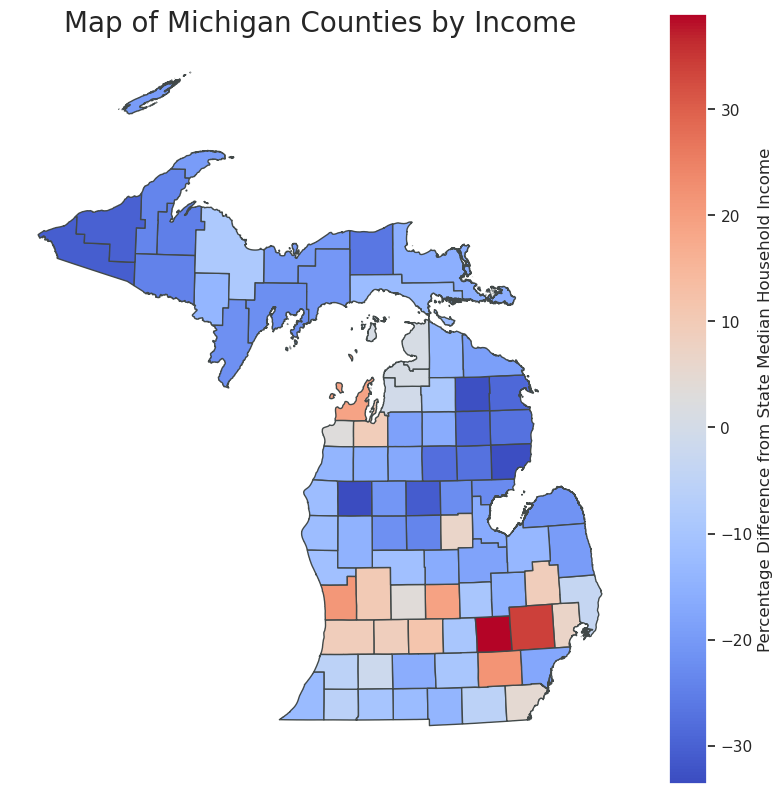

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shapely
from matplotlib.colors import LinearSegmentedColormap 
import cartopy.crs as ccrs
import metpy as mp
from metpy.plots import USCOUNTIES
import seaborn as sns

# Apply the default theme
sns.set_theme()
# Load Michigan county shapefile
mi_counties = gpd.read_file("/home/central/majes1ce/notebooks/Climate Project/County.shp") 
dbf = gpd.read_file("/home/central/majes1ce/notebooks/Climate Project/County.dbf")

med_income = int(69183) #none of the county incomes are greater by more than 25k

#Save the updated DataFrame back to an Excel file
df=pd.read_excel('/home/central/majes1ce/notebooks/Climate Project/MasterListOfDataByCounty.xlsx', sheet_name='List of Counties')
df.rename(columns={'Unnamed: 0': 'Label'}, inplace=True)
df.to_excel("updated_excel_file.xlsx", index=False)
specific_columns = ['Label','median household income in dollars']
df=pd.read_excel('updated_excel_file.xlsx', usecols=specific_columns)

df['median household income in dollars']=df['median household income in dollars'].astype(int)
df['Label']=df['Label'].astype(str)
#income_array=np.zeros(13)     #temp array to make sure work works

merged_map=dbf.merge(df, on='Label')

merged_map['Income Dif']=((merged_map['median household income in dollars']-med_income)/med_income)*100

# Plot the map
# levels = [-25000, -20000, -15000, -10000, -5000, 0, 5000, 10000, 15000, 20000, 25000]
palatte=sns.color_palette("coolwarm", as_cmap=True)
plt.rcParams['axes.facecolor'] = 'none'
merged_map.plot(column='Income Dif',edgecolor="#424949", cmap=palatte,figsize=(10,10),legend=True,legend_kwds={'label': "Percentage Difference from State Median Household Income"})
plt.title("Map of Michigan Counties by Income", fontsize=20)
plt.gca().set_xticks([])  # Turn off x-axis labels
plt.gca().set_yticks([])  # Turn off y-axis labels
plt.savefig('cb_friendly_map.png')
plt.show()